In [7]:
import numpy as np
import math

In [42]:
from numpy import dtype


def estimated(a, x):
    res, sz = 0, len(a)
    for i in range(sz - 1, -1, -1):
        res = res * x + a[i]
    return res

def BPTTRR(x, y, deg):
    sums = [np.sum(np.fromiter((xi**j for xi in x), dtype=float), dtype=float) for j in range(deg * 2 + 1)]
    A = np.zeros((deg + 1, deg + 1))    
    b = np.zeros((deg + 1, 1))
    
    for i in range(deg + 1):
        for j in range(deg + 1):
            A[i, j] = sums[i + j]

    for j in range(deg + 1):
        b[j,0] = np.sum(np.fromiter((x[i]**j * y[i] for i in range(len(x))), dtype=float)) 
    return np.linalg.solve(A, b)

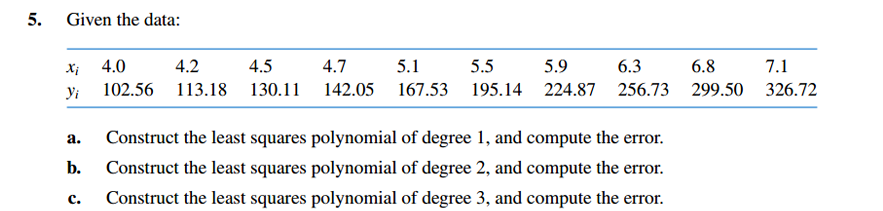

In [49]:
x = np.array([4.0, 4.2, 4.5, 4.7, 5.1, 5.5, 5.9, 6.3, 6.8, 7.1])
y = np.array([102.56, 113.18, 130.11, 142.05, 167.53, 195.14, 224.87, 256.73, 299.50, 326.72])
# x = np.array([1, 2, 3, 4])
# y = np.array([1, 2, 3, 4])
max_deg = 3
min_deg = 1

print('====== x axis ======')
print(x)
print('====== y axis ======')
print(y, '\n\n')

for deg in range(min_deg, max_deg + 1):
    print()
    print('====== BAC', deg, '======')
    a = BPTTRR(x, y, deg)
    print('+ He so cua da thuc:', np.transpose(a))
    p = estimated(a, x)
    print()
    print('+ y_estimated =', p)
    print()
    print('+ Bac', deg, ': Sai so:', np.sum(np.fromiter(((y[i]-p[i])**2 for i in range(len(x))), dtype=float)), '\n')

====== x axis ======
[4.  4.2 4.5 4.7 5.1 5.5 5.9 6.3 6.8 7.1]
====== y axis ======
[102.56 113.18 130.11 142.05 167.53 195.14 224.87 256.73 299.5  326.72] 



====== BAC 1 ======
+ He so cua da thuc: [[-194.13824073   72.0845177 ]]

+ y_estimated = [ 94.19983005 108.61673359 130.2420889  144.65899244 173.49279951
 202.32660659 231.16041367 259.99422075 296.0364796  317.66183491]

+ Bac 1 : Sai so: 329.0131930338964 


====== BAC 2 ======
+ He so cua da thuc: [[ 1.23556037 -1.14352337  6.61821092]]

+ y_estimated = [102.55284159 113.17800282 130.10847631 142.05727973 167.54325718
 195.14706213 224.86869457 256.7081545  299.48567433 326.74055685]

+ Bac 2 : Sai so: 0.0014429128859297848 


====== BAC 3 ======
+ He so cua da thuc: [[ 3.42909438 -2.37922111  6.84557777 -0.01367456]]

+ y_estimated = [102.56628217 113.17923649 130.09945459 142.04583386 167.53459994
 195.14700025 224.87778375 256.72169941 299.49018646 326.72792307]

+ Bac 3 : Sai so: 0.000527341203057358 




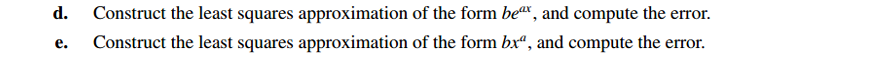

In [51]:
def estimated(a, x):
    return a[0, 0] * np.exp(a[1, 0] * x)

In [52]:
'''ln(y) = ln(b) + ax'''

x = np.array([4.0, 4.2, 4.5, 4.7, 5.1, 5.5, 5.9, 6.3, 6.8, 7.1])
y = np.array([102.56, 113.18, 130.11, 142.05, 167.53, 195.14, 224.87, 256.73, 299.50, 326.72])
max_deg = 1
min_deg = 1

print('====== x axis ======')
print(x)
print('====== y axis ======')
print(y, '\n\n')

for deg in range(min_deg, max_deg + 1):
    print()
    print('====== BAC', deg, '======')
    a = BPTTRR(x, np.log(y), deg)
    a[0][0] = np.exp(a[0][0])
    print('+ He so cua da thuc:', np.transpose(a))
    p = estimated(a, x)
    print()
    print('+ y_estimated =', p)
    print()
    print('+ Bac', deg, ': Sai so:', np.sum(np.fromiter(((y[i]-p[i])**2 for i in range(len(x))), dtype=float)), '\n')

====== x axis ======
[4.  4.2 4.5 4.7 5.1 5.5 5.9 6.3 6.8 7.1]
====== y axis ======
[102.56 113.18 130.11 142.05 167.53 195.14 224.87 256.73 299.5  326.72] 



====== BAC 1 ======
+ He so cua da thuc: [[24.25876026  0.37238177]]

+ y_estimated = [107.58754499 115.90619992 129.60557166 139.62665753 162.0532261
 188.08190753 218.29126633 253.35279498 305.20199924 341.27492414]

+ Bac 1 : Sai so: 417.69099537759257 



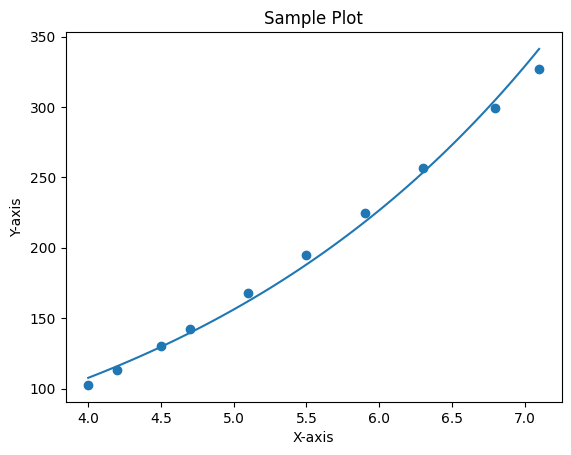

In [53]:
import matplotlib.pyplot as plt
import numpy as np

def f(x):
    return 24.25876026 * np.exp(0.37238177 * x)


# Define your data
x = np.array([4.0, 4.2, 4.5, 4.7, 5.1, 5.5, 5.9, 6.3, 6.8, 7.1])
y = np.array([102.56, 113.18, 130.11, 142.05, 167.53, 195.14, 224.87, 256.73, 299.50, 326.72])

# Create the plot
plt.scatter(x, y)
plt.plot(np.linspace(4.0, 7.1, 100), f(np.linspace(4.0, 7.1, 100)))

# Add labels and title
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Sample Plot")

# Show the plot
plt.show()

In [56]:
def estimated(a, x):
    return a[0, 0] * (x ** a[1, 0])

In [57]:
'''ln(y) = ln(b) + ax'''

x = np.array([4.0, 4.2, 4.5, 4.7, 5.1, 5.5, 5.9, 6.3, 6.8, 7.1])
y = np.array([102.56, 113.18, 130.11, 142.05, 167.53, 195.14, 224.87, 256.73, 299.50, 326.72])
max_deg = 1
min_deg = 1

print('====== x axis ======')
print(x)
print('====== y axis ======')
print(y, '\n\n')

for deg in range(min_deg, max_deg + 1):
    print()
    print('====== BAC', deg, '======')
    a = BPTTRR(np.log(x), np.log(y), deg)
    a[0][0] = np.exp(a[0][0])
    print('+ He so cua da thuc:', np.transpose(a))
    p = estimated(a, x)
    print()
    print('+ y_estimated =', p)
    print()
    print('+ Bac', deg, ': Sai so:', np.sum(np.fromiter(((y[i]-p[i])**2 for i in range(len(x))), dtype=float)), '\n')

====== x axis ======
[4.  4.2 4.5 4.7 5.1 5.5 5.9 6.3 6.8 7.1]
====== y axis ======
[102.56 113.18 130.11 142.05 167.53 195.14 224.87 256.73 299.5  326.72] 



====== BAC 1 ======
+ He so cua da thuc: [[6.2390295  2.01954138]]

+ y_estimated = [102.5656901  113.18653704 130.10882128 142.05171339 167.52679923
 195.1237477  224.84569491 256.69556047 299.50442268 326.78980694]

+ Bac 1 : Sai so: 0.007023205195694701 



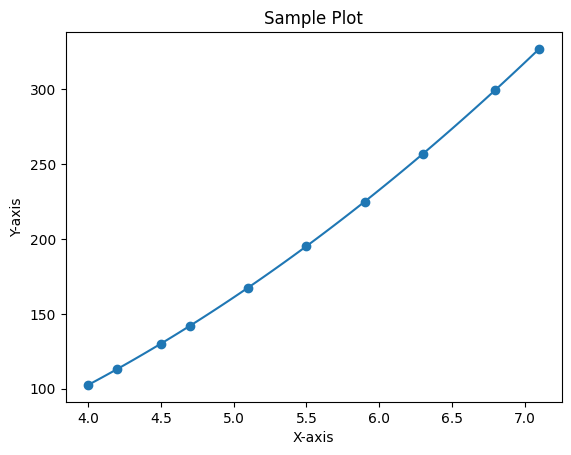

In [58]:
import matplotlib.pyplot as plt
import numpy as np

def f(x):
    return 6.2390295 * x ** 2.01954138


# Define your data
x = np.array([4.0, 4.2, 4.5, 4.7, 5.1, 5.5, 5.9, 6.3, 6.8, 7.1])
y = np.array([102.56, 113.18, 130.11, 142.05, 167.53, 195.14, 224.87, 256.73, 299.50, 326.72])

# Create the plot
plt.scatter(x, y)
plt.plot(np.linspace(4.0, 7.1, 100), f(np.linspace(4.0, 7.1, 100)))

# Add labels and title
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Sample Plot")

# Show the plot
plt.show()